# Wilfire Prediction Project

## Visualize Dataset

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder, StandardScaler
import pandas as pd
import calendar
import seaborn as sns

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
# Import Dataset
uci = pd.read_csv("forestfires.csv")

In [4]:
uci

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


In [5]:
# Convert Month/Day columns to numerical features
uci['month'] = uci['month'].apply(lambda x: list(calendar.month_abbr).index(x.capitalize()))
uci['day'] = uci['day'].apply(lambda x: list(calendar.day_abbr).index(x.capitalize()) + 1)


'''#Scale our numerical data
continuous = ['X', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH',
       'wind', 'rain', 'area']
uci[continuous] = StandardScaler().fit_transform(uci[continuous])'''

print(uci.to_numpy())

[[ 7.    5.    3.   ...  6.7   0.    0.  ]
 [ 7.    4.   10.   ...  0.9   0.    0.  ]
 [ 7.    4.   10.   ...  1.3   0.    0.  ]
 ...
 [ 7.    4.    8.   ...  6.7   0.   11.16]
 [ 1.    4.    8.   ...  4.    0.    0.  ]
 [ 6.    3.   11.   ...  4.5   0.    0.  ]]


In [6]:
uci

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,3,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,7,4,10,2,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,7,4,10,6,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,8,6,3,5,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,8,6,3,7,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,8,7,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,8,7,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,8,7,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,8,6,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


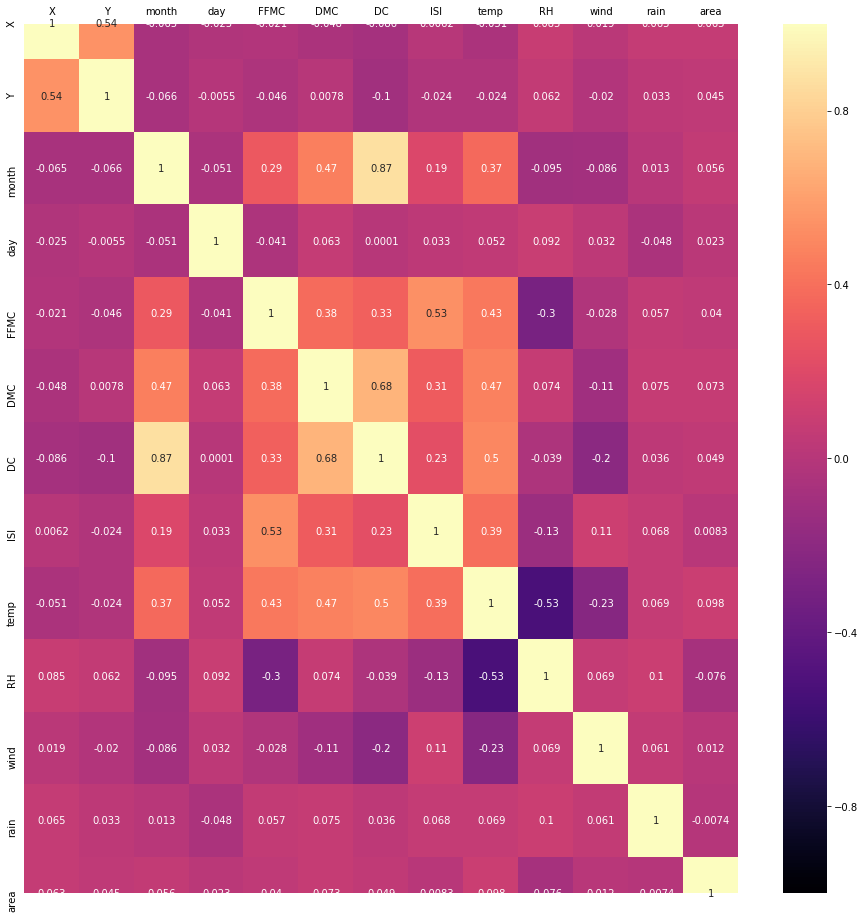

In [7]:
# Plots correlation matrix between features in UCI dataset
plt.figure(figsize=(16, 16))
ax = sns.heatmap(uci.corr(), annot=True, fmt='.2g', vmin=-1, vmax=1, center=0, cmap='magma')
ax.tick_params(axis='both', which='both', labelsize=10, labelbottom = False, left=False, bottom=False, top = False, labeltop=True)

In [8]:
print(uci["Y"].unique())

[5 4 6 3 2 9 8]


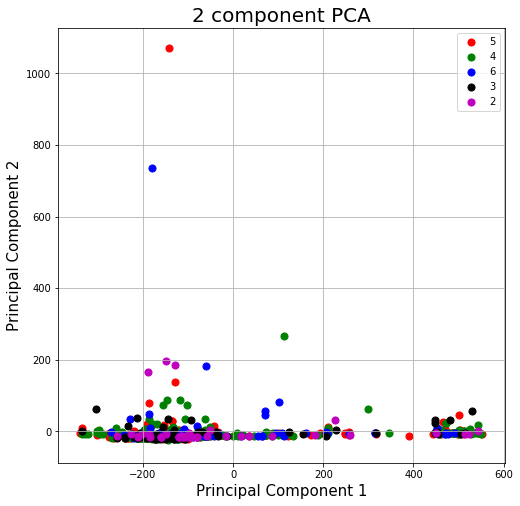

In [9]:
targets = uci["Y"].unique()
X = uci.drop(columns=['Y'])
colors = ['r', 'g', 'b', 'k', 'm']
#project to 2D space so we can visualize it
pca = PCA(n_components = 2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDf, uci['Y']], axis = 1)

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Y'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

## Regression and Classification

In [25]:
# Normalization
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import train_test_split
x = uci.values
X_train, X_test, y_train, y_test = train_test_split(x[:, 0:-1], x[:, -1], test_size=0.2, random_state=42, shuffle=True)
normalizer = Normalizer()
X_train = normalizer.fit_transform(X_train)
X_test = normalizer.transform(X_test)

In [26]:
# Non-normalized data for Classification
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import train_test_split
x = uci.values
X_train, X_test, y_train, y_test = train_test_split(x[:, 0:-1], x[:, -1], test_size=0.2, random_state=42, shuffle=True)


In [27]:
from sklearn.ensemble import RandomForestClassifier
x = uci.values
bins = [0, 0.25, 10, 100, 300, 1000, 5000]
# Conversion from hectares to acres to fire size code
x[:, -1] = np.digitize(x[:, -1] * 2.47105, bins)
X_train, X_test, y_train, y_test = train_test_split(x[:, 0:-1], x[:, -1], test_size=0.2, random_state=42, shuffle=True)
forest = RandomForestClassifier(random_state=1)
forest.fit(X_train, y_train.ravel())
score_rf = forest.score(X_test, y_test)
print(score)

0.5192307692307693


In [28]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(base_estimator=forest, random_state=1)
ada.fit(X_train, y_train.ravel())
score_ada = ada.score(X_test, y_test)
print(score)

0.5192307692307693


In [29]:
from sklearn.naive_bayes import ComplementNB
bayes = ComplementNB()
bayes.fit(X_train, y_train.ravel())
score_nb = bayes.score(X_test, y_test)
print(score)

0.5192307692307693


In [30]:
from sklearn.naive_bayes import GaussianNB
bayes = GaussianNB()
bayes.fit(X_train, y_train.ravel())
score_nbg = bayes.score(X_test, y_test)
print(score)

0.5192307692307693


In [31]:
from sklearn.svm import SVC
clf = SVC(gamma='auto')
clf.fit(X_train, y_train.ravel())
score_svm = clf.score(X_test, y_test)
print(score)

0.5192307692307693


([0, 1, 2, 3, 4], <a list of 5 Text xticklabel objects>)

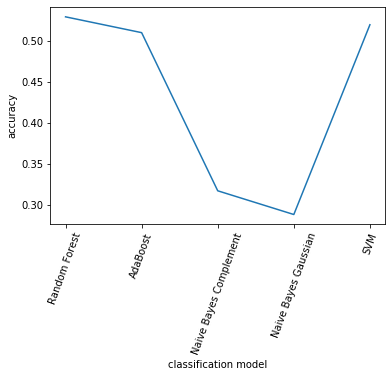

In [35]:
scores = [score_rf, score_ada, score_nb, score_nbg, score_svm]
model = ["Random Forest", "AdaBoost", "Naive Bayes Complement", "Naive Bayes Gaussian", "SVM"]
plt.plot(model, scores)
plt.ylabel("accuracy")
plt.xlabel("classification model")
plt.xticks(rotation=70)

In [17]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.model_selection import KFold


#convert labels to one-hot encodings first
y_train = y_train.astype(int)
y_test = y_test.astype(int)
y_train_enc = np.zeros((y_train.size, y_train.max()))
y_train_enc[np.arange(y_train.size),y_train - 1] = 1

y_test_enc = np.zeros((y_test.size, y_test.max()))
y_test_enc[np.arange(y_test.size),y_test - 1] = 1

inputs = np.concatenate((X_train, X_test), axis=0)
targets = np.concatenate((y_train_enc, y_test_enc), axis=0)


num_folds = 5
kfold = KFold(n_splits=num_folds, shuffle=True)
lr = [1e-3, 1e-4, 5e-4, 8e-4, 1e-5]
acc_per_fold = []
loss_per_fold = []
histories = []
fold_no = 0
models = []
for train, test in kfold.split(X_train, y_train_enc):
    model = Sequential()
    model.add(Dense(16, input_dim=12, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(12, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(8, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(6, activation='softmax'))
    
    optimizer = keras.optimizers.Adam(learning_rate=lr[fold_no])
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    history = model.fit(inputs[train], targets[train],
              epochs=20)
    scores = model.evaluate(inputs[test], targets[test], verbose=0)
    print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
    acc_per_fold.append(scores[1] * 100)
    loss_per_fold.append(scores[0])
    histories.append(history)
    models.append(model)
    fold_no += 1



Using TensorFlow backend.


Instructions for updating:
If using Keras pass *_constraint arguments to layers.

Epoch 1/20
330/330 [==============================] - 0s 964us/step - loss: 96.5043 - accuracy: 0.1333
Epoch 2/20
330/330 [==============================] - 0s 73us/step - loss: 57.2798 - accuracy: 0.1485
Epoch 3/20
330/330 [==============================] - 0s 66us/step - loss: 42.9225 - accuracy: 0.1909
Epoch 4/20
330/330 [==============================] - 0s 69us/step - loss: 32.8018 - accuracy: 0.2000
Epoch 5/20
330/330 [==============================] - 0s 72us/step - loss: 22.6747 - accuracy: 0.2485
Epoch 6/20
330/330 [==============================] - 0s 70us/step - loss: 16.9721 - accuracy: 0.2545
Epoch 7/20
330/330 [==============================] - 0s 69us/step - loss: 12.5944 - accuracy: 0.2485
Epoch 8/20
330/330 [==============================] - 0s 68us/step - loss: 10.5781 - accuracy: 0.2485
Epoch 9/20
330/330 [==============================] - 0s 65us/step - loss: 8.6649 - accuracy: 0.2788


Epoch 13/20
331/331 [==============================] - 0s 118us/step - loss: 6.0689 - accuracy: 0.3716
Epoch 14/20
331/331 [==============================] - 0s 112us/step - loss: 4.9424 - accuracy: 0.4079
Epoch 15/20
331/331 [==============================] - 0s 119us/step - loss: 3.8948 - accuracy: 0.3897
Epoch 16/20
331/331 [==============================] - 0s 142us/step - loss: 4.2191 - accuracy: 0.3867
Epoch 17/20
331/331 [==============================] - 0s 103us/step - loss: 4.2665 - accuracy: 0.4048
Epoch 18/20
331/331 [==============================] - 0s 97us/step - loss: 3.2492 - accuracy: 0.4320
Epoch 19/20
331/331 [==============================] - 0s 102us/step - loss: 3.6798 - accuracy: 0.3897
Epoch 20/20
331/331 [==============================] - 0s 69us/step - loss: 3.0255 - accuracy: 0.4169
Score for fold 3: loss of 1.6167539241837292; accuracy of 50.0%
Epoch 1/20
331/331 [==============================] - 0s 1ms/step - loss: 32.5699 - accuracy: 0.3142
Epoch 2/20
33

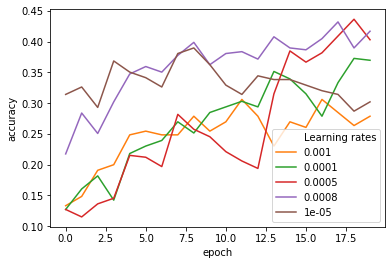

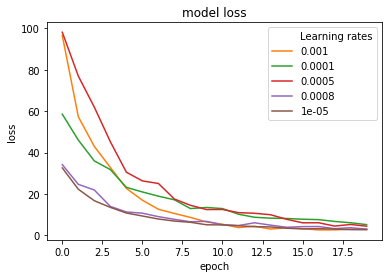

In [23]:
plt.plot([], [], ' ', label="Learning rates")
for i in range(5):
    plt.plot(histories[i].history['accuracy'], label=lr[i])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()
plt.show()

plt.plot([], [], ' ', label="Learning rates")
for i in range(5):
    plt.plot(histories[i].history['loss'], label=lr[i])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()
plt.show()



In [75]:
print(max(acc_per_fold))
print(acc_per_fold.index(max(acc_per_fold)))


47.56097495555878
4


In [76]:
model = models[4]
results = model.evaluate(X_test, y_test_enc)
print("test loss, test acc:", results)

104/104 [==============================] - 0s 257us/step
test loss, test acc: [1.6278665157464833, 0.49038460850715637]
